### Training on $(0,1)$ & Testing on $(0,1.5)$ $function$ $f(x)=x^2$

Epoch 0, Loss: 0.373145
Epoch 50, Loss: 0.002033
Epoch 100, Loss: 0.000432
Epoch 150, Loss: 0.000236
Epoch 200, Loss: 0.000163
Epoch 250, Loss: 0.000096
Epoch 300, Loss: 0.000066
Epoch 350, Loss: 0.000055
Epoch 400, Loss: 0.000049
Epoch 450, Loss: 0.000044


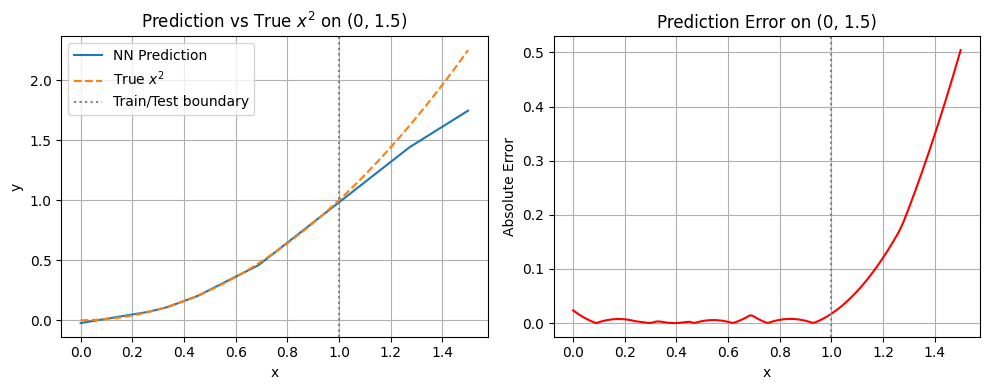

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

#training data in (0, 1)
x_train = torch.linspace(0.01, 0.99, 100).unsqueeze(1)
y_train = x_train ** 2

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# Model setup
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the network
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")

# Evaluate on (0, 1.5)
model.eval()
x_test = torch.linspace(0.0, 1.5, 150).unsqueeze(1)
y_true = x_test ** 2
y_pred = model(x_test).detach()
error = torch.abs(y_pred - y_true)

# Plot prediction vs true with extrapolation
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(x_test.numpy(), y_pred.numpy(), label='NN Prediction')
plt.plot(x_test.numpy(), y_true.numpy(), label='True $x^2$', linestyle='--')
plt.axvline(1.0, color='gray', linestyle=':', label='Train/Test boundary')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Prediction vs True $x^2$ on (0, 1.5)")
plt.legend()
plt.grid(True)

# Plot error
plt.subplot(1, 2, 2)
plt.plot(x_test.numpy(), error.numpy(), color='red')
plt.axvline(1.0, color='gray', linestyle=':')
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.title("Prediction Error on (0, 1.5)")
plt.grid(True)

plt.tight_layout()
plt.show()
